# 🎯 Projeto de Análise de Fraudes com Aprendizado de Máquina

> Este projeto tem como objetivo desenvolver um pipeline completo de ciência de dados para **detecção de fraudes** em transações financeiras.

Serão abordadas as seguintes etapas:

- 📥 Carregamento dos dados
- 🧹 Limpeza e pré-processamento
- 📊 Análise exploratória
- ✂️ Separação treino/teste
- 🧠 Modelagem preditiva
- 📈 Avaliação de performance
- 🧭 Conclusões e próximos passos

---

## 📥 Carregamento da Base de Dados

Nesta etapa, realizamos a importação da base de dados original utilizando **pandas**.

A base contém diversas informações sobre transações financeiras, incluindo a variável alvo `fraud_bool`, que indica se a transação foi fraudulenta (1) ou não (0).


## 🧹 Tratamento de Dados Ausentes

Ao identificar valores ausentes, realizamos o tratamento adequado para garantir a qualidade da base de dados.

Isso evita falhas durante a modelagem e aumenta a confiabilidade das análises.

## 📊 Análise Exploratória

Aqui observamos:
- A distribuição das variáveis numéricas e categóricas
- A proporção de transações fraudulentas
- Possíveis outliers e padrões relevantes

Essa etapa é essencial para entender o comportamento dos dados e gerar hipóteses.

## ✂️ Separação entre Treino e Teste

Dividimos a base de dados para treinar os modelos com parte dos dados e avaliar o desempenho com outra parte nunca vista.

🔐 **Objetivo**: evitar overfitting e garantir a capacidade de generalização do modelo.

## 🤖 Modelagem Preditiva

Nesta etapa, utilizamos algoritmos de **Machine Learning supervisionado** como:

- Regressão Logística
- Random Forest

O objetivo é prever a variável `fraud_bool` com base nas demais características da transação.

## 📈 Avaliação dos Modelos

Avaliação feita por meio de métricas como:

- Matriz de confusão
- Acurácia
- Precisão
- Recall
- F1-score

Essas métricas ajudam a escolher o modelo mais eficiente para detectar fraudes.

## 🎯 Importância das Variáveis

Analisamos as variáveis mais influentes na decisão dos modelos, como forma de explicar o comportamento da fraude e apoiar a tomada de decisões futuras.

Essa etapa também ajuda na **engenharia de features** e no entendimento do domínio.

## 🧭 Conclusão

Finalizamos o projeto com uma visão completa do processo de detecção de fraudes.

✅ **Resultados alcançados:**
- Modelos com boa performance
- Insights relevantes sobre variáveis influentes

🚀 **Próximos passos sugeridos:**
- Aplicar técnicas de balanceamento (ex: SMOTE)
- Testar modelos mais robustos (XGBoost, LightGBM)
- Realizar validação cruzada
- Criar painel de monitoramento das previsões em tempo real

# Projeto de Análise de Fraudes com Aprendizado de Máquina
Este notebook apresenta um pipeline completo de ciência de dados com o objetivo de detectar transações fraudulentas. O fluxo contempla desde o carregamento dos dados até a modelagem preditiva, passando por tratamento, análise exploratória e construção de variáveis.

## Separação entre Treino e Teste
Dividimos o conjunto de dados em treino e teste para avaliar a performance do modelo de forma justa, evitando overfitting.

In [105]:
# Importa a biblioteca pandas, usada para manipulação e análise de dados.
import pandas as pd

# Importa a biblioteca numpy, usada para manipulação de arrays e operações numéricas.
import numpy as np

# Importa a biblioteca pyplot do matplotlib, usada para criar gráficos.
from matplotlib import pyplot as plt

# Importa a biblioteca seaborn, que é uma extensão do matplotlib para criar gráficos mais atraentes e informativos.
import seaborn as sns

# Importando a biblioteca math para funções matemáticas.
import math

# Importa a função train_test_split para dividir os dados em conjuntos de treino e teste.
from sklearn.model_selection import train_test_split

# Importa a biblioteca preprocessing para utilizar o MinMaxScaler e StandardScaler, usados para normalização e padronização de dados.
from sklearn.preprocessing import StandardScaler

# Importa a biblioteca Pipeline para construir fluxos de trabalho de machine learning com pré-processamento e modelos.
from sklearn.pipeline import Pipeline

# Importa a classe LogisticRegression para aplicar a regressão logística.
from sklearn.linear_model import LogisticRegression

# Importa a classe RandomForestClassifier para aplicar a classificação usando Random Forest.
from sklearn.ensemble import RandomForestClassifier

# Importa a classe DecisionTreeClassifier para aplicar a classificação usando árvore de decisão.
from sklearn.tree import DecisionTreeClassifier

# Importa as métricas roc_auc_score, confusion_matrix e classification_report para avaliar o desempenho do modelo.
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

#import goole.colab para integração com o Google Colab.
#from colab import drive

# Importa o GridSearchCV para realizar a busca em grade de hiperparâmetros para o modelo.
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Importa a biblioteca _pickle para serialização e desserialização de objetos.
import _pickle as cPickle

# Importa joblib, usado para salvar e carregar modelos de forma eficiente.
import joblib

# Importa a biblioteca de warnings para controlar a exibição de mensagens de aviso.
import warnings

# Ignora todas as mensagens de aviso, evitando que apareçam no terminal durante a execução do código.
warnings.filterwarnings("ignore")

# Configurações do pandas para melhor visualização dos dados:

# Exibe todo o conteúdo da célula, sem truncamento.
pd.set_option('display.max_colwidth', None)

# Evita que quebre a linha automaticamente ao exibir dataframes grandes.
pd.set_option('display.expand_frame_repr', False)

# Aumenta a largura do display para acomodar mais informações.
pd.set_option('display.width', 300)


In [106]:
# Dicionário com informações das variáveis
dictionary = {
    "fraud_bool": ("Indicador de fraude na solicitação de abertura de conta.", "0: Legítima, 1: Fraudulenta"),
    "income": ("Renda declarada do cliente.", "Valor numérico representando a renda."),
    "name_email_similarity": ("Similaridade entre o nome e o e-mail fornecido.", "Valor entre 0 e 1."),
    "prev_address_months_count": ("Número de meses no endereço anterior.", "Valor numérico."),
    "current_address_months_count": ("Número de meses no endereço atual.", "Valor numérico."),
    "customer_age": ("Idade do cliente.", "Valor numérico."),
    "days_since_request": ("Dias desde a solicitação de abertura de conta.", "Valor numérico."),
    "payment_type": ("Tipo de método de pagamento utilizado.", "Exemplos: AA, AB, etc."),
    "zip_count_4w": ("Número de vezes que o CEP foi usado nas últimas 4 semanas.", "Valor numérico."),
    "velocity_6h": ("Velocidade de transações em uma janela de 6 horas.", "Valor numérico."),
    "velocity_24h": ("Velocidade de transações em uma janela de 24 horas.", "Valor numérico."),
    "velocity_4w": ("Velocidade de transações em uma janela de 4 semanas.", "Valor numérico."),
    "bank_branch_count_8w": ("Número de agências bancárias utilizadas nas últimas 8 semanas.", "Valor numérico."),
    "date_of_birth_distinct_emails_4w": ("Número de e-mails distintos usados com a mesma data de nascimento nas últimas 4 semanas.", "Valor numérico."),
    "credit_risk_score": ("Pontuação de risco de crédito atribuída ao cliente.", "Valor numérico."),
    "email_is_free": ("Se o domínio de e-mail é gratuito.", "0: Não, 1: Sim"),
    "housing_status": ("Situação de moradia do cliente.", "Exemplos: Own, Rent, etc."),
    "job_title": ("Cargo profissional do cliente.", "Exemplos: Engineer, Teacher, etc."),
    "length_of_residence": ("Tempo total de residência no endereço atual.", "Valor numérico."),
    "proposed_credit_limit": ("Limite de crédito proposto na solicitação.", "Valor numérico."),
    "foreign_request": ("Se a solicitação foi feita fora do país de origem.", "0: Não, 1: Sim"),
    "source": ("Origem da solicitação.", "Exemplos: INTERNET, PHONE, etc."),
    "session_length_in_minutes": ("Duração da sessão de solicitação em minutos.", "Valor numérico."),
    "device_os": ("Sistema operacional do dispositivo usado.", "Exemplos: Windows, iOS, etc."),
    "keep_alive_session": ("Se a sessão foi mantida ativa.", "0: Não, 1: Sim"),
    "device_distinct_emails_8w": ("Número de e-mails distintos usados no mesmo dispositivo nas últimas 8 semanas.", "Valor numérico."),
    "device_fraud_count": ("Número de fraudes associadas ao dispositivo.", "Valor numérico."),
    "month": ("Número do mês da solicitação.", "1 a 12."),
    "month_named": ("Nome do mês da solicitação.", "Exemplos: January, February, etc.")
}

# Criar DataFrame a partir do dicionário
dict_df = pd.DataFrame(dictionary.items(), columns=["Variável", "Info"])

# Separar as colunas de descrição e categorias
dict_df["Descrição"] = dict_df["Info"].apply(lambda x: x[0])
dict_df["Categorias"] = dict_df["Info"].apply(lambda x: x[1])

# Definir tipo de variável
dict_df["Tipo"] = dict_df["Variável"].apply(
    lambda x: "Numérica" if x in [
        "income", "name_email_similarity", "prev_address_months_count", "current_address_months_count",
        "customer_age", "days_since_request", "zip_count_4w", "velocity_6h", "velocity_24h", "velocity_4w",
        "bank_branch_count_8w", "date_of_birth_distinct_emails_4w", "credit_risk_score", "length_of_residence",
        "proposed_credit_limit", "session_length_in_minutes", "device_distinct_emails_8w", "device_fraud_count",
        "month"
    ] else "Categórica"
)

# Remover coluna auxiliar
dict_df.drop(columns=["Info"], inplace=True)

# Exibir o DataFrame
dict_df


,Variável,Descrição,Categorias,Tipo
0,fraud_bool,Indicador de fraude na solicitação de abertura de conta.,"0: Legítima, 1: Fraudulenta",Categórica
1,income,Renda declarada do cliente.,Valor numérico representando a renda.,Numérica
2,name_email_similarity,Similaridade entre o nome e o e-mail fornecido.,Valor entre 0 e 1.,Numérica
3,prev_address_months_count,Número de meses no endereço anterior.,Valor numérico.,Numérica
4,current_address_months_count,Número de meses no endereço atual.,Valor numérico.,Numérica
5,customer_age,Idade do cliente.,Valor numérico.,Numérica
6,days_since_request,Dias desde a solicitação de abertura de conta.,Valor numérico.,Numérica
7,payment_type,Tipo de método de pagamento utilizado.,"Exemplos: AA, AB, etc.",Categórica
8,zip_count_4w,Número de vezes que o CEP foi usado nas últimas 4 semanas.,Valor numérico.,Numérica
9,velocity_6h,Velocidade de transações em uma janela de 6 horas.,Valor numérico.,Numérica


## Carregamento da Base de Dados
Nesta etapa, a base de dados bruta é carregada para o ambiente utilizando a biblioteca pandas. Ela contém informações sobre transações e características dos usuários, incluindo uma variável indicando se houve ou não fraude (`fraud_bool`).

In [107]:


# Montar o Google Drive
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sgpjesus/bank-account-fraud-dataset-neurips-2022")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Fabia\.cache\kagglehub\datasets\sgpjesus\bank-account-fraud-dataset-neurips-2022\versions\2


In [108]:

# Carregar o dataset em um DataFrame do pandas
df = pd.read_csv(path + "/base.csv")
# Exibir as primeiras linhas do DataFrame para conferir os dados
# Substituir o nome das colunas após carregar o dataframe


# Mostrar as primeiras linhas para conferir
df.head(3)
df.columns


Index(['fraud_bool', 'income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status', 'credit_risk_score', 'email_is_free', 'housing_status', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source', 'session_length_in_minutes', 'device_os',
       'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

In [109]:
print( 'Número de instâncias do dataset : {}'.format( df.shape[0] ) )
print( 'Número de atributos do dataset: {}'.format( df.shape[1] ) )

Número de instâncias do dataset : 1000000
Número de atributos do dataset: 32


In [110]:
# verifica linhas duplicadas

df.duplicated().sum()

np.int64(0)

In [111]:
# target diretamente com base na variável fraud_bool
df['target'] = df['fraud_bool'].astype(int)

# Separar X e y
y = df['target']  # variável resposta
X = df.drop('target', axis=1)  # variáveis explicativas

# Verificar formatos
X.shape, y.shape


((1000000, 32), (1000000,))

## Análise Exploratória
Realizamos uma exploração inicial para entender a distribuição das variáveis, detectar possíveis outliers, e observar o balanceamento entre classes (fraude vs. não fraude).

In [112]:
from sklearn.model_selection import train_test_split

# Separar treino e teste mantendo a proporção de classes
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,       # 30% para teste
    random_state=42,     # reprodutibilidade
    stratify=y           # mantém proporção de classes
)

# Verificar o balanceamento nas divisões
print("Proporção no conjunto original:")
print(y.value_counts(normalize=True), "\n")

print("Proporção no treino:")
print(y_train.value_counts(normalize=True), "\n")

print("Proporção no teste:")
print(y_test.value_counts(normalize=True))


Proporção no conjunto original:
target
0    0.988971
1    0.011029
Name: proportion, dtype: float64 

Proporção no treino:
target
0    0.988971
1    0.011029
Name: proportion, dtype: float64 

Proporção no teste:
target
0    0.98897
1    0.01103
Name: proportion, dtype: float64


In [113]:
df_treino = pd.concat([X_train,y_train], axis = 1)

In [114]:
df_treino.shape

(700000, 33)

In [115]:
df_treino.head(2)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,target
533494,0,0.1,0.242896,-1,189,40,0.010444,-0.751620,AB,1301,...,200.0,0,INTERNET,6.863800,other,0,1,0,3,0
172378,0,0.1,0.996538,-1,251,20,0.020638,-1.409882,AD,3785,...,200.0,0,INTERNET,7.942521,macintosh,0,1,0,1,0


In [116]:
pd.DataFrame.info(df_treino);

<class 'pandas.core.frame.DataFrame'>
Index: 700000 entries, 533494 to 228494
Data columns (total 33 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fraud_bool                        700000 non-null  int64  
 1   income                            700000 non-null  float64
 2   name_email_similarity             700000 non-null  float64
 3   prev_address_months_count         700000 non-null  int64  
 4   current_address_months_count      700000 non-null  int64  
 5   customer_age                      700000 non-null  int64  
 6   days_since_request                700000 non-null  float64
 7   intended_balcon_amount            700000 non-null  float64
 8   payment_type                      700000 non-null  object 
 9   zip_count_4w                      700000 non-null  int64  
 10  velocity_6h                       700000 non-null  float64
 11  velocity_24h                      700000 non-null  f

In [117]:
# separando em listas: variáveis numéricas e categóricas
num_vars = df_treino.select_dtypes(include=['number']).columns.tolist()  # Seleciona colunas numéricas
num_vars = [col for col in num_vars if col != 'target']  # Remove a variável target

cat_vars = df_treino.select_dtypes(exclude=['number']).columns.tolist()  # Colunas categóricas

# Exibindo os resultados
print("Variáveis Numéricas:", num_vars)
print("Variáveis Categóricas:", cat_vars)
print("Qtd Variáveis Numéricas:", len(num_vars))
print("Qtd Variáveis Categóricas:", len(cat_vars))
print("Tipo da Variável Resposta:", df_treino['target'].dtypes)


Variáveis Numéricas: ['fraud_bool', 'income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month']
Variáveis Categóricas: ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
Qtd Variáveis Numéricas: 27
Qtd Variáveis Categóricas: 5
Tipo da Variável Resposta: int64


## Tratamento de Dados Ausentes
Aqui identificamos e tratamos valores nulos, o que é crucial para evitar erros durante a modelagem e garantir a integridade dos dados.

In [118]:
# Calcular percentual de valores ausentes e zeros para cada variável

# Percentual de valores ausentes (NaN) para cada variável
missing_percent = df_treino.isnull().mean() * 100  # O método isnull() retorna um DataFrame booleano onde True indica valores ausentes. Mean() calcula a média (porcentagem) de valores ausentes.

# Percentual de zeros para cada variável
zeros_percent = (df_treino == 0).mean() * 100  # O código (df == 0) cria um DataFrame booleano, onde True representa zeros. Mean() calcula a porcentagem de zeros.

# Criar um DataFrame para mostrar os resultados de valores ausentes e zeros
missing_zeros_df = pd.DataFrame({
    'features': df_treino.columns,  # Coluna com o nome das variáveis
    'missing': missing_percent,  # Coluna com percentual de valores ausentes
    'zeros': zeros_percent  # Coluna com percentual de zeros
})

# Resetando o índice para garantir que não haja problemas com duplicação de colunas
missing_zeros_df.reset_index(drop=True, inplace=True)

# Ordenar o DataFrame pelas variáveis com maior percentual de valores ausentes
missing_zeros_df = missing_zeros_df.sort_values(by='missing', ascending=False)  # Ordena o DataFrame pela coluna 'missing', de forma decrescente.

# Exibir o DataFrame corrigido com a coluna 'features' com o nome correto
missing_zeros_df = missing_zeros_df[['features', 'missing', 'zeros']]  # Selecionando apenas as colunas desejadas

# Exibir o DataFrame final
missing_zeros_df


,features,missing,zeros
0,fraud_bool,0.0,98.897143
1,income,0.0,0.000000
2,name_email_similarity,0.0,0.000000
3,prev_address_months_count,0.0,0.000000
4,current_address_months_count,0.0,0.963714
5,customer_age,0.0,0.000000
6,days_since_request,0.0,0.000000
7,intended_balcon_amount,0.0,0.000000
8,payment_type,0.0,0.000000
9,zip_count_4w,0.0,0.000000


## Análise Exploratória
Realizamos uma exploração inicial para entender a distribuição das variáveis, detectar possíveis outliers, e observar o balanceamento entre classes (fraude vs. não fraude).

In [119]:
df_treino['target'].value_counts()

target
0    692280
1      7720
Name: count, dtype: int64

## Análise Exploratória
Realizamos uma exploração inicial para entender a distribuição das variáveis, detectar possíveis outliers, e observar o balanceamento entre classes (fraude vs. não fraude).

In [120]:
df_treino['target'].value_counts(normalize=True)

target
0    0.988971
1    0.011029
Name: proportion, dtype: float64

In [121]:
df_treino.head(2)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,target
533494,0,0.1,0.242896,-1,189,40,0.010444,-0.751620,AB,1301,...,200.0,0,INTERNET,6.863800,other,0,1,0,3,0
172378,0,0.1,0.996538,-1,251,20,0.020638,-1.409882,AD,3785,...,200.0,0,INTERNET,7.942521,macintosh,0,1,0,1,0


## Análise Exploratória
Realizamos uma exploração inicial para entender a distribuição das variáveis, detectar possíveis outliers, e observar o balanceamento entre classes (fraude vs. não fraude).

Text(0.5, 1.0, 'Distribuição da variável resposta')

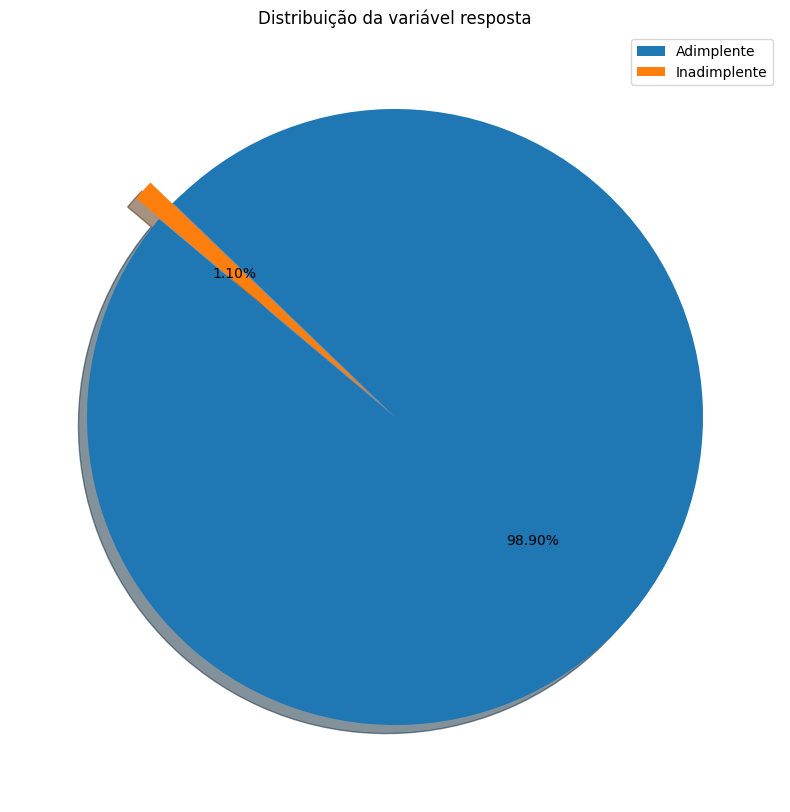

In [122]:
# Define o tamanho da figura do gráfico (10x10 polegadas)
plt.figure(figsize=(10,10))

# O explode destaca a segunda fatia (0.1), enquanto a primeira fatia não é destacada (0).
# Isso pode ser usado para dar mais destaque a uma das categorias.
explode = [0, 0.1]

# Cria o gráfico de pizza (pie chart)
# df['target'].value_counts() conta as ocorrências de cada valor na coluna 'target'
# explode define o destaque das fatias
# autopct='%1.2f%%' exibe as porcentagens das fatias no gráfico com 2 casas decimais
# shadow=True adiciona uma sombra ao gráfico para dar um efeito tridimensional
# startangle=140 define o ângulo de início do gráfico, em graus (140 graus gira o gráfico para que a primeira fatia fique na parte superior)
plt.pie(df_treino['target'].value_counts(), explode=explode, autopct='%1.2f%%', shadow=True, startangle=140)

# Adiciona uma legenda ao gráfico com os rótulos para cada categoria (Adimplente e Inadimplente)
plt.legend(labels=['Adimplente', 'Inadimplente'])

# Define o título do gráfico
plt.title('Distribuição da variável resposta')


## Análise Exploratória
Realizamos uma exploração inicial para entender a distribuição das variáveis, detectar possíveis outliers, e observar o balanceamento entre classes (fraude vs. não fraude).

In [123]:
df_treino[num_vars].describe(percentiles = [0.01,0.75, 0.99])

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,7.000000e+05,700000.000000,700000.000000,700000.000000,...,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.0,700000.000000
mean,0.011029,0.562649,0.493809,16.727346,86.621020,33.695000,1.027806e+00,8.665100,1572.573460,5661.894626,...,0.889449,10.848057,0.222641,516.048929,0.025263,7.554306,0.577209,1.018436,0.0,3.289077
std,0.104436,0.290484,0.289046,44.045083,88.443165,12.025118,5.395607e+00,20.238694,1004.729825,3009.771699,...,0.313576,12.121328,0.416020,487.852571,0.156923,8.056462,0.494003,0.180773,0.0,2.208719
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
1%,0.000000,0.100000,0.021748,-1.000000,0.000000,10.000000,2.789648e-04,-1.831204,247.000000,692.876754,...,0.000000,-1.000000,0.000000,200.000000,0.000000,0.650243,0.000000,1.000000,0.0,0.000000
50%,0.000000,0.600000,0.492320,-1.000000,52.000000,30.000000,1.516199e-02,-0.830227,1263.000000,5313.061021,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114016,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755491,12.000000,130.000000,40.000000,2.632769e-02,5.016469,1944.000000,7680.131782,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.871891,1.000000,1.000000,0.0,5.000000
99%,1.000000,0.900000,0.997469,231.000000,370.000000,60.000000,2.201318e+01,100.842546,4967.000000,13930.418801,...,1.000000,31.000000,1.000000,1500.000000,1.000000,44.732289,1.000000,2.000000,0.0,7.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,83.213536,1.000000,2.000000,0.0,7.000000


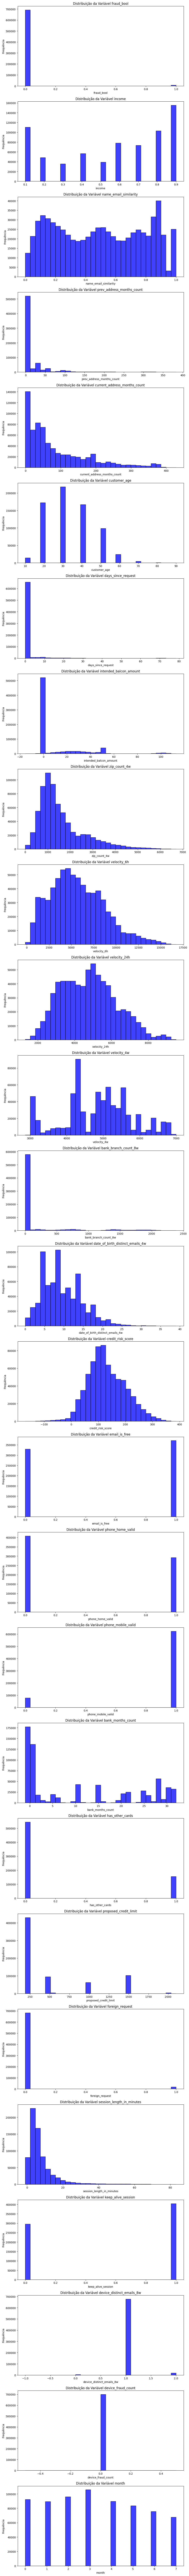

In [124]:
# Criar uma figura com múltiplos histogramas
# Utiliza o método subplots do matplotlib para criar uma figura com múltiplos subgráficos (axes)
# nrows= len(num_vars) cria uma linha de gráficos, uma para cada variável numérica
# ncols=1 define que teremos uma coluna de subgráficos
# figsize=(10, 5 * len(num_vars)) define o tamanho da figura com base no número de variáveis numéricas, aumentando a altura conforme necessário
fig, axes = plt.subplots(nrows=len(num_vars), ncols=1, figsize=(10, 5 * len(num_vars)))

# Criar um histograma para cada variável numérica
# O loop for percorre todas as variáveis numéricas
for i, var in enumerate(num_vars):
    # Utiliza o Seaborn para criar um histograma para cada variável, passando o eixo específico (ax=axes[i])
    # color="blue" define a cor do histograma
    # bins=30 define o número de barras (bins) no histograma
    sns.histplot(df_treino[var], ax=axes[i], color="blue", bins=30)

    # Define o título do gráfico para cada variável
    axes[i].set_title(f'Distribuição da Variável {var}')

    # Define o rótulo no eixo x (nome da variável)
    axes[i].set_xlabel(var)

    # Define o rótulo no eixo y (Frequência)
    axes[i].set_ylabel('Frequência')

# Ajusta o layout dos subgráficos para que fiquem bem organizados e sem sobreposição
plt.tight_layout()

# Exibe os gráficos gerados
plt.show()


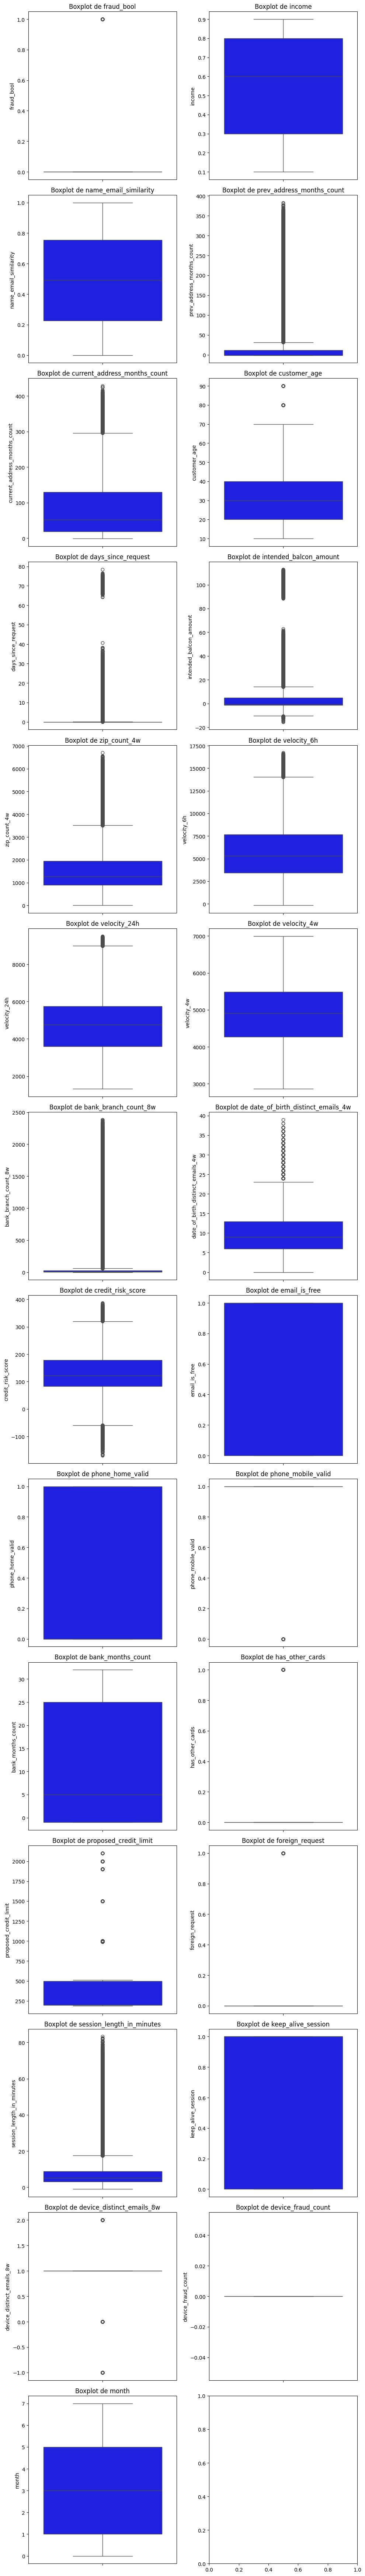

In [125]:
# Calcular o número de linhas necessárias para exibir 2 boxplots por linha
ncols = 2  # número de colunas (2 boxplots por linha)
nrows = math.ceil(len(num_vars) / ncols)  # número de linhas necessárias

# Criar uma figura com múltiplos boxplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 5 * nrows))

# Fazer o loop para criar um boxplot para cada variável numérica
for i, var in enumerate(num_vars):
    row = i // ncols  # Calcula a linha onde o boxplot será colocado
    col = i % ncols   # Calcula a coluna onde o boxplot será colocado
    sns.boxplot(y=df_treino[var], ax=axes[row, col], color="blue")  # Cria o boxplot
    axes[row, col].set_title(f'Boxplot de {var}')  # Define o título para cada boxplot
    axes[row, col].set_ylabel(var)  # Define o rótulo do eixo y (nome da variável)

# Ajusta o layout dos gráficos para que fiquem bem organizados
plt.tight_layout()

# Exibe os gráficos gerados
plt.show()


Text(0.5, 1.0, 'Correlação entre os atributos')

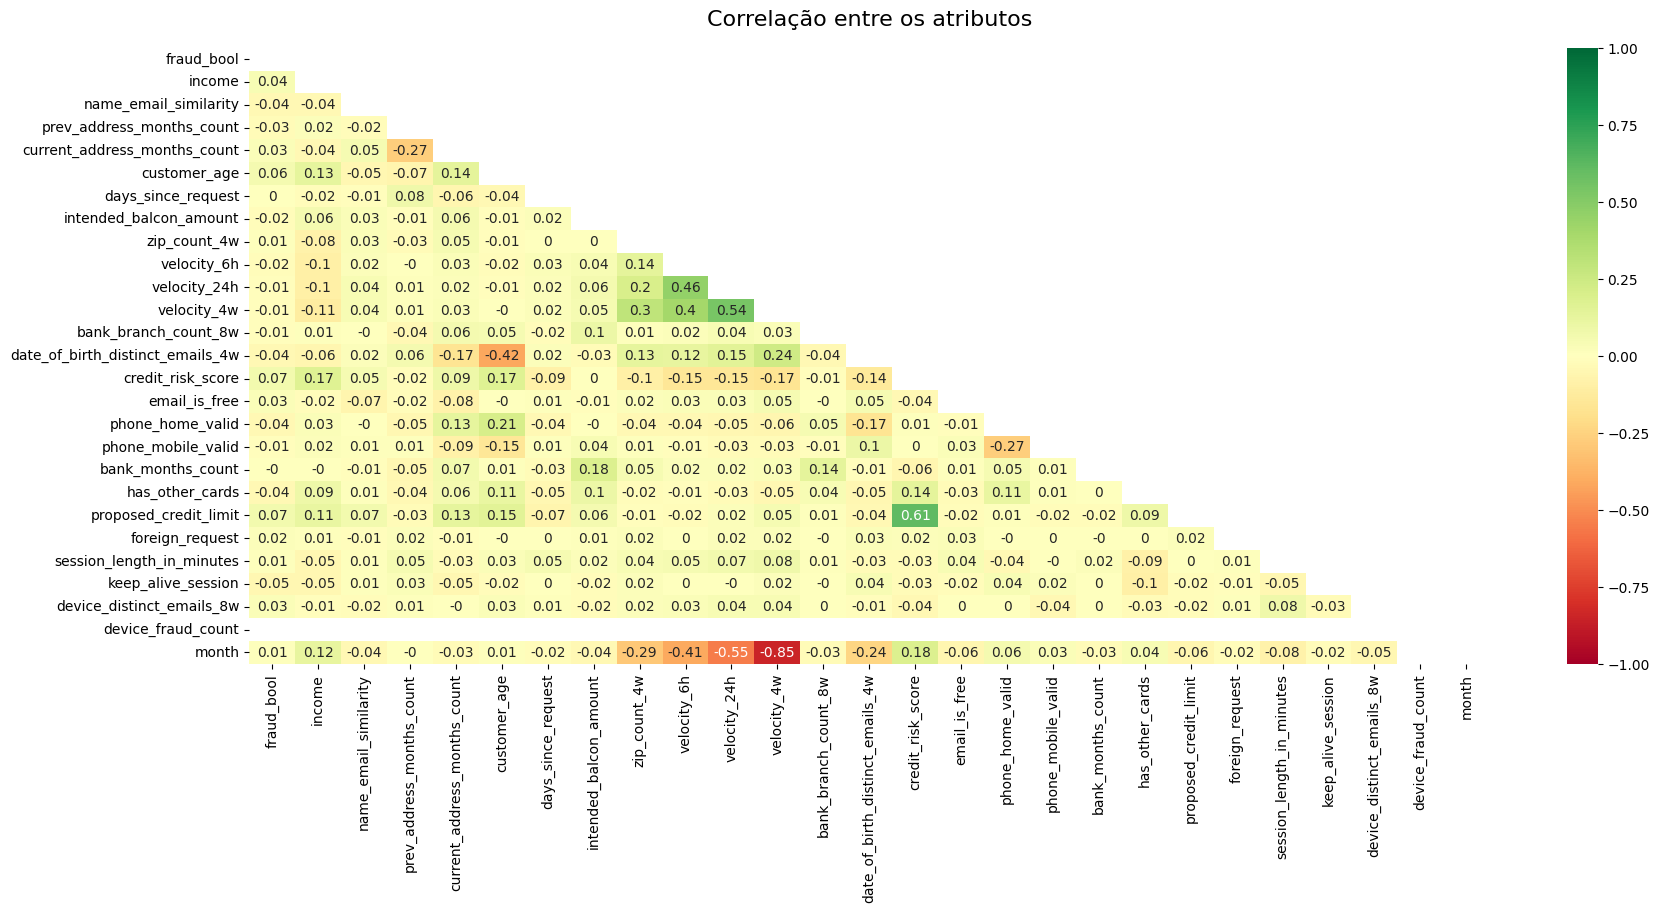

In [126]:
# Criando uma matriz de correlação com um gráfico de calor (heatmap)
plt.figure(figsize=(20, 8))  # Define o tamanho da figura do gráfico de calor

# Definindo uma máscara para ocultar a parte superior da matriz de correlação
# np.triu cria uma matriz triangular superior com 1s acima da diagonal e 0s na diagonal e abaixo
mask = np.triu(np.ones_like(df_treino[num_vars].corr(method='pearson').round(2), dtype=bool))

# Gerando o gráfico de calor (heatmap)
# df[num_vars].corr(method='pearson') calcula a matriz de correlação de Pearson entre as variáveis numéricas
# round(2) arredonda os valores da correlação para duas casas decimais
# O parâmetro mask é utilizado para ocultar a parte superior da matriz, deixando visível apenas a parte inferior (para evitar redundância)
# vmin e vmax definem os valores mínimo e máximo da escala de cores, respectivamente -1 e 1
# annot=True adiciona os valores numéricos de correlação em cada célula
# cmap="RdYlGn" define o mapa de cores, variando de vermelho para verde (indicando correlação negativa e positiva, respectivamente)
# square=False faz com que o gráfico não seja quadrado
# center=0 centraliza o gráfico de calor em torno de 0, destacando correlações negativas e positivas
heatmap = sns.heatmap(df_treino[num_vars].corr(method='pearson').round(2), mask=mask, vmin=-1, vmax=1, annot=True, cmap="RdYlGn", square=False, center=0)

# Adicionando título ao gráfico
heatmap.set_title('Correlação entre os atributos', fontdict={'fontsize': 16}, pad=16)



In [127]:
df.head(3)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,target
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,1500.0,0,INTERNET,16.224843,linux,1,1,0,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,1500.0,0,INTERNET,3.363854,other,1,1,0,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,200.0,0,INTERNET,22.730559,windows,0,1,0,0,0


## Separação entre Treino e Teste
Dividimos o conjunto de dados em treino e teste para avaliar a performance do modelo de forma justa, evitando overfitting.

In [128]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.combine import SMOTEENN
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

## Carregamento da Base de Dados
Nesta etapa, a base de dados bruta é carregada para o ambiente utilizando a biblioteca pandas. Ela contém informações sobre transações e características dos usuários, incluindo uma variável indicando se houve ou não fraude (`fraud_bool`).

📊 Classification Report:
              precision    recall  f1-score   support

           0     0.9973    0.7857    0.8790    197794
           1     0.0406    0.8128    0.0773      2206

    accuracy                         0.7860    200000
   macro avg     0.5190    0.7992    0.4781    200000
weighted avg     0.9868    0.7860    0.8701    200000



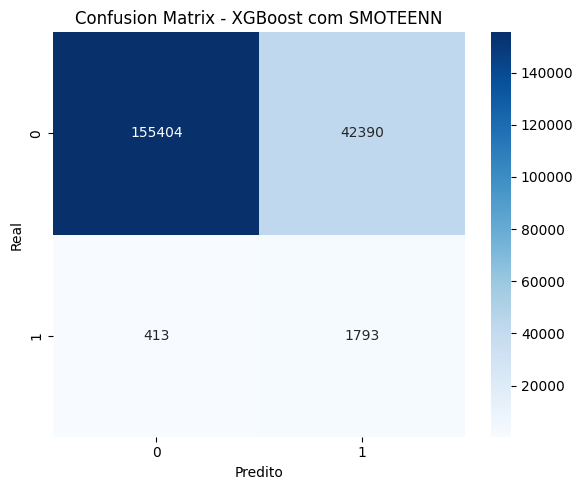

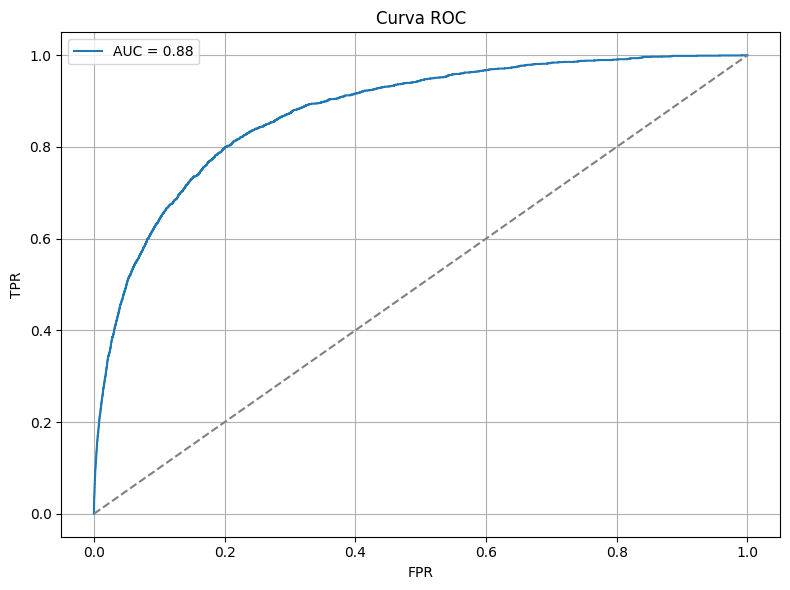

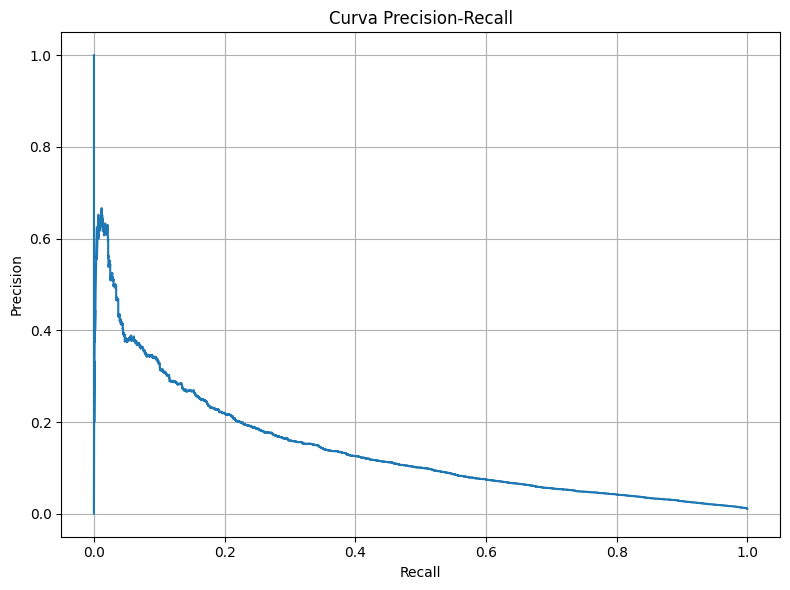

In [ ]:
# Função para carregar os dados
def carregar_dados(caminho_csv):
    return pd.read_csv(caminho_csv)

# Função para codificar variáveis categóricas e booleanas
def codificar_dados(df):
    df = df.copy()
    for col in df.select_dtypes(include='object').columns:
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))
    for col in df.select_dtypes(include='bool').columns:
        df[col] = df[col].astype(int)
    return df

# Função para tratar valores nulos
def tratar_nulos(X):
    imputer = SimpleImputer(strategy='median')
    return pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Função para preparar os dados para treino e teste
def preparar_dados(df):
    df = df.dropna(subset=['fraud_bool'])
    X = df.drop(columns=["fraud_bool"])
    y = df["fraud_bool"]
    X = codificar_dados(X)
    X = tratar_nulos(X)
    return train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Função para balancear as amostras usando SMOTEENN
def balancear_amostras(X_train, y_train):
    X_sampled, _, y_sampled, _ = train_test_split(
        X_train, y_train, stratify=y_train, test_size=0.8, random_state=42
    )
    smote_enn = SMOTEENN(random_state=42)
    return smote_enn.fit_resample(X_sampled, y_sampled)

# Função para treinar o modelo XGBoost
def treinar_modelo(X, y):
    model = XGBClassifier(
        scale_pos_weight=10,
        eval_metric='logloss',
        use_label_encoder=False,
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42
    )
    model.fit(X, y)
    return model

# Função para avaliar o modelo
def avaliar_modelo(model, X_test, y_test, threshold=0.1): #trashold ajustado para 0.1
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_proba > threshold).astype(int)

    print("📊 Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix - XGBoost com SMOTEENN")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("Curva ROC")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Curva Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Curva Precision-Recall")
    plt.grid()
    plt.tight_layout()
    plt.show()


# 🚀 Execução

# Substitua o caminho pelo local do seu arquivo CSV
path   # Exemplo para Colab, altere conforme sua necessidade
caminho_csv = path + "/base.csv"

# Pipeline completo
df = carregar_dados(caminho_csv)
X_train, X_test, y_train, y_test = preparar_dados(df)
X_bal, y_bal = balancear_amostras(X_train, y_train)
modelo = treinar_modelo(X_bal, y_bal)
avaliar_modelo(modelo, X_test, y_test)

In [ ]:
# Função para carregar os dados
def carregar_dados(caminho_csv):
    return pd.read_csv(caminho_csv)

# Função para codificar variáveis categóricas e booleanas
def codificar_dados(df):
    df = df.copy()
    for col in df.select_dtypes(include='object').columns:
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))
    for col in df.select_dtypes(include='bool').columns:
        df[col] = df[col].astype(int)
    return df

# Função para tratar valores nulos
def tratar_nulos(X):
    imputer = SimpleImputer(strategy='median')
    return pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Função para preparar os dados para treino e teste
def preparar_dados(df):
    df = df.dropna(subset=['fraud_bool'])
    X = df.drop(columns=["fraud_bool"])
    y = df["fraud_bool"]
    X = codificar_dados(X)
    X = tratar_nulos(X)
    return train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Função para balancear as amostras usando SMOTEENN
def balancear_amostras(X_train, y_train):
    X_sampled, _, y_sampled, _ = train_test_split(
        X_train, y_train, stratify=y_train, test_size=0.8, random_state=42
    )
    smote_enn = SMOTEENN(random_state=42)
    return smote_enn.fit_resample(X_sampled, y_sampled)

# Função para treinar o modelo XGBoost
def treinar_modelo(X, y):
    model = XGBClassifier(
        scale_pos_weight=10,
        eval_metric='logloss',
        use_label_encoder=False,
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42
    )
    model.fit(X, y)
    return model

# Função para avaliar o modelo
def avaliar_modelo(model, X_test, y_test, threshold=0.1): #trashold ajustado para 0.1
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_proba > threshold).astype(int)

    print("📊 Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix - XGBoost com SMOTEENN")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("Curva ROC")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Curva Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Curva Precision-Recall")
    plt.grid()
    plt.tight_layout()
    plt.show()


# 🚀 Execução

# Substitua o caminho pelo local do seu arquivo CSV
path   # Exemplo para Colab, altere conforme sua necessidade
caminho_csv = path + "/Variant I.csv"

# Pipeline completo
df = carregar_dados(caminho_csv)
X_train, X_test, y_train, y_test = preparar_dados(df)
X_bal, y_bal = balancear_amostras(X_train, y_train)
modelo = treinar_modelo(X_bal, y_bal)
avaliar_modelo(modelo, X_test, y_test)

In [137]:
# Criar cópia do dataset original
df_ouro = df.copy()

# Aplicar mesmo pré-processamento (sem a variável target)
df_ouro_codificado = codificar_dados(df_ouro.drop(columns=["fraud_bool"]))
df_ouro_codificado = tratar_nulos(df_ouro_codificado)

# 🔍 Predição com o modelo já treinado
probabilidades = modelo.predict_proba(df_ouro_codificado)[:, 1]

# Aplicar o mesmo threshold usado na avaliação (0.4)
df_ouro["predicao_fraude"] = (probabilidades > 0.4).astype(int)

# Visualizar resultado
df_ouro[["fraud_bool", "predicao_fraude"]].head()


,fraud_bool,predicao_fraude
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [138]:
# 🎯 Comparações
acertos_fraude = ((df_ouro["fraud_bool"] == 1) & (df_ouro["predicao_fraude"] == 1)).sum()
acertos_nao_fraude = ((df_ouro["fraud_bool"] == 0) & (df_ouro["predicao_fraude"] == 0)).sum()

total_fraudes = (df_ouro["fraud_bool"] == 1).sum()
total_nao_fraudes = (df_ouro["fraud_bool"] == 0).sum()

# Percentuais
perc_fraude = (acertos_fraude / total_fraudes) * 100 if total_fraudes > 0 else 0
perc_nao_fraude = (acertos_nao_fraude / total_nao_fraudes) * 100 if total_nao_fraudes > 0 else 0

# Total geral
total = len(df_ouro)
acertos_geral = acertos_fraude + acertos_nao_fraude
perc_geral = (acertos_geral / total) * 100

# 📊 Resultado
print(f"✔️ Acertos em FRAUDES (1): {acertos_fraude} de {total_fraudes} ({perc_fraude:.2f}%)")
print(f"✔️ Acertos em NÃO FRAUDES (0): {acertos_nao_fraude} de {total_nao_fraudes} ({perc_nao_fraude:.2f}%)")
print(f"🎯 TOTAL DE ACERTOS: {acertos_geral} de {total} registros ({perc_geral:.2f}%)")


✔️ Acertos em FRAUDES (1): 6004 de 11029 (54.44%)
✔️ Acertos em NÃO FRAUDES (0): 935653 de 988971 (94.61%)
🎯 TOTAL DE ACERTOS: 941657 de 1000000 registros (94.17%)


In [139]:
df_ouro.to_csv("df_ouro_com_predicao.csv", index=False)


In [ ]:
from google.colab import files
files.download("df_ouro_com_predicao.csv")


## Conclusão
Este projeto demonstrou como construir um pipeline completo para detecção de fraudes. Passamos por todas as etapas essenciais, desde o pré-processamento até a avaliação de modelos. Como próximos passos, pode-se aplicar técnicas de balanceamento (como SMOTE), explorar modelos mais avançados (como XGBoost) e realizar validação cruzada para maior robustez.